Benjamin Cavallari

In the cell below, include **all** your ``import`` statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise:** $\chi^2$ fitting for the $f(x) = mx + b$ model. You should include:
- The contour plot with $m$ on the horizontal axis and $b$ on the vertical axis. Your plot should include
    - a mark at the best-fit values of $(m, b)$
    - contours for the 68% and 95% confidence limits
- An error bar plot that includes
    - the data points with error bars
    - a model curve that uses the best-fit values of $(m, b)$

Overall, make sure that all the axes are labeled.

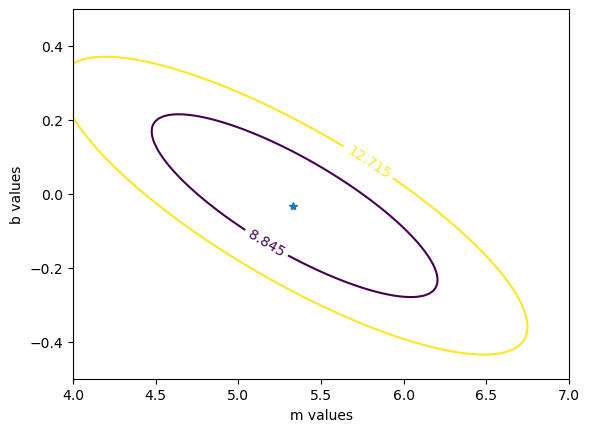

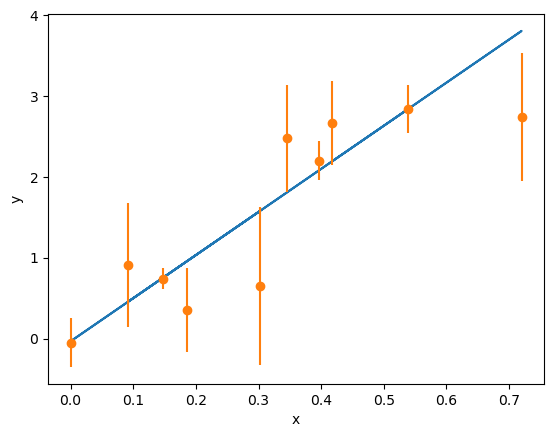

In [5]:
independent_variables, data, uncertainties = np.loadtxt('Lab3Data.csv',delimiter=',',usecols=(0,1,2),unpack=True)

def new_chi_squared(m,b):
    x = independent_variables
    y = data
    sigma = uncertainties
    X = sum(((y-((m*x)+b))**2)/(sigma**2))
    return X

m_values = np.linspace(4,7,100)
b_values = np.linspace(-0.5,0.5,200)
new_graph = np.zeros((len(b_values),len(m_values)))
new_chi_values = np.zeros(len(m_values))

for i in range(len(m_values)): 
    new_chi_values[i] = new_chi_squared(m_values[i],0)

for b in range(len(b_values)):
    for m in range(len(m_values)):
        new_graph[b,m] = new_chi_squared(m_values[m],b_values[b])

CS = plt.contour(m_values,b_values,new_graph, levels = [np.min(new_chi_values)+2.3,np.min(new_chi_values)+6.17])
minimum_index = np.unravel_index(np.argmin(new_graph), new_graph.shape)

independent_variables, data, uncertainties = np.loadtxt('Lab3Data.csv',delimiter=',',usecols=(0,1,2),unpack=True)
best_fit = np.zeros(len(independent_variables))
for i in range(len(independent_variables)):
    best_fit[i] = (((m_values[minimum_index[1]] * independent_variables[i]) + b_values[minimum_index[0]]))

plt.plot(m_values[minimum_index[1]],b_values[minimum_index[0]], '*')
plt.clabel(CS)
plt.xlabel("m values")
plt.ylabel("b values")
plt.show()

plt.plot( independent_variables, best_fit)
plt.errorbar(independent_variables, data, yerr = uncertainties, fmt='o')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Exercise:**  Using ``interference.py``, create a heat map from double slit interference

In [7]:
import interference as pattern

**Exercise:** Using functions from ``interference.py`` create heat maps for the interference pattern from N-slits. Once with N = 4, and a second with a value of N that creates an interesting pattern.

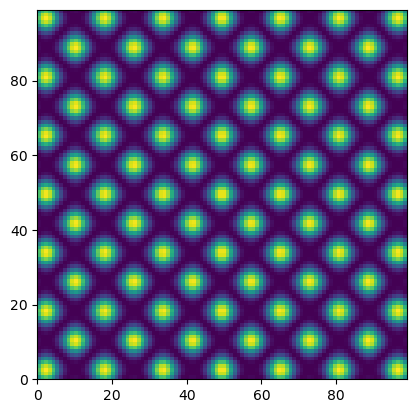

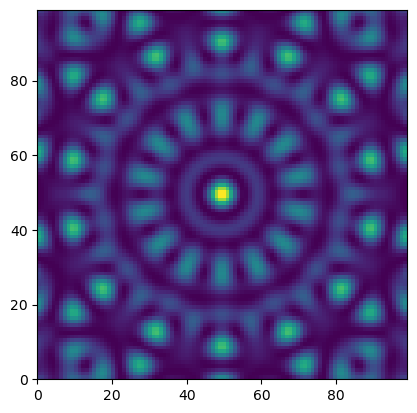

In [9]:
X_VALUES = np.linspace(-50,50,100)
Y_VALUES = np.linspace(-50,50,100)
pattern_graph = np.zeros((len(X_VALUES),len(Y_VALUES)))


def intensity(N):
    for Y in range(len(Y_VALUES)):
        for X in range(len(X_VALUES)):
                pattern_graph[X,Y] = pattern.NIntensity2D(X_VALUES[X],Y_VALUES[Y],N)

intensity(4)
    

plt.imshow(pattern_graph, extent=[X_VALUES.argmin(), X_VALUES.argmax(), Y_VALUES.argmin(), Y_VALUES.argmax()])
plt.show()

intensity(7)

plt.imshow(pattern_graph, extent=[X_VALUES.argmin(), X_VALUES.argmax(), Y_VALUES.argmin(), Y_VALUES.argmax()])
plt.show()

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

When you are happy with your results, you will submit by uploading this file on Github.